# Initial Data Exploration and Classification

In [1]:
import pyspark

In [2]:
import numpy as np
import pyspark
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def group_labels(file):
    data = pd.read_csv(file, sep=',')
    data[['Id', 'Zone']] = data['Id'].str.split("_", expand = True)
    data1 = data[['Id', 'Probability']]
    data2 = pd.DataFrame(data1.groupby('Id', as_index=False)['Probability'].sum())
    return data2

def group_labels_binary(file):
    df = group_labels(file)
    #print(df)
    df['Probability'] = df['Probability'].apply(lambda x: 1 if x>0 else 0)
    #print(df)
    return df

def create_histogram(df):
    df.hist()
    plt.show()

In [17]:
#data = spark.read.text("pima-indians-diabetes.data")
data = spark.read.format("csv").option("delimiter", ",").option("inferSchema", "true").load("gs://passenger-screening-bd/stage1_labels.csv")
#might need to do a model.fit somewhere
data.show()

+--------------------+-----------+
|                 _c0|        _c1|
+--------------------+-----------+
|                  Id|Probability|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          1|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|00360f79fd6e02781...|          0|
|0043db5e8c819bffc...|          1|
|0043db5e8c819bffc...|          0|
+--------------------+-----------+
only showing top 20 rows



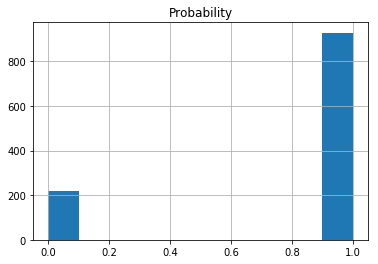

In [18]:
dflabel = group_labels_binary("/home/rg3047/data/stage1_labels.csv")
create_histogram(dflabel)

In [19]:
def read_header(infile):
    # declare dictionary
    h = dict()
    
    with open(infile, 'r+b') as fid:

        h['filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
        h['parent_filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
        h['comments1'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
        h['comments2'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
        h['energy_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['config_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['file_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['trans_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scan_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['data_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['date_modified'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 16))
        h['frequency'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['mat_velocity'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['num_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_polarization_channels'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['spare00'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['adc_min_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['adc_max_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['band_width'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['spare01'] = np.fromfile(fid, dtype = np.int16, count = 5)
        h['polarization_type'] = np.fromfile(fid, dtype = np.int16, count = 4)
        h['record_header_size'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['word_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['word_precision'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['min_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['max_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['avg_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['data_scale_factor'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['data_units'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['surf_removal'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['edge_weighting'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['x_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['y_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['z_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['t_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['spare02'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['x_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['scan_orientation'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scan_direction'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['data_storage_order'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scanner_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['x_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['t_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['num_x_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_y_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_z_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_t_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['x_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['date_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
        h['time_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
        h['depth_recon'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['elevation_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['roll_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['azimuth_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['adc_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['spare06'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scanner_radius'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['t_delay'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['range_gate_start'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['range_gate_end'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['ahis_software_version'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['spare_end'] = np.fromfile(fid, dtype = np.float32, count = 10)

    return h

In [20]:
lst = []
path = "/home/rg3047/data/stage1/"
directory = os.fsencode(path)

for file in os.listdir(directory):
    result = {}
    filename = os.fsdecode(file)
    if filename.endswith(".aps"):
        header = read_header(path + filename)
        
        for x in header:
            try:
                result[x] = header[x][0]
            except:
                result[x] = header[x]
        result['real_filename'] = filename.split('.')[0]
        try:
            p = dflabel['Probability'].loc[dflabel['Id'] == result['real_filename']].iloc[0]
            result['probability'] = p
            lst.append(result)
        except:
            continue
        #header['probability'] = dflabel['Probability'].where(dflabel['Id'] == header['real_filename'])
        #print(header)
        
    #if filename.endswith(".asm") or filename.endswith(".py"): 
        # print(os.path.join(directory, filename))
    #   continue
    #else:
    #    continue

#print(lst)

In [21]:
df = pd.DataFrame(lst)
print(df['probability'])
#df.info()

0       0
1       0
2       1
3       1
4       0
5       1
6       1
7       1
8       0
9       0
10      1
11      1
12      1
13      0
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      1
26      1
27      0
28      0
29      1
       ..
1117    0
1118    0
1119    1
1120    1
1121    1
1122    0
1123    1
1124    0
1125    1
1126    0
1127    0
1128    1
1129    0
1130    0
1131    1
1132    1
1133    1
1134    1
1135    0
1136    0
1137    1
1138    1
1139    1
1140    1
1141    1
1142    1
1143    1
1144    1
1145    1
1146    0
Name: probability, Length: 1147, dtype: int64


In [42]:
#had to copy file to bucket, could not read directly

#df.to_csv("/home/rg3047/data/tmpdf.csv", index=False)

data = spark.read.format("csv").option("delimiter", ",").option("header", True).option("inferSchema", "true").load("gs://passenger-screening-bd/tmpdf.csv")

#might need to do a model.fit somewhere
#data.show()

In [43]:
data.select('probability').show(1000, False)

+-----------+
|probability|
+-----------+
|0          |
|0          |
|1          |
|1          |
|0          |
|1          |
|1          |
|1          |
|0          |
|0          |
|1          |
|1          |
|1          |
|0          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|0          |
|1          |
|1          |
|1          |
|1          |
|1          |
|0          |
|0          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|0          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|0          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|1          |
|0          |
|1          |
|1    

In [44]:
data = data.na.drop()
data.printSchema()

root
 |-- adc_max_voltage: double (nullable = true)
 |-- adc_min_voltage: double (nullable = true)
 |-- adc_type: integer (nullable = true)
 |-- ahis_software_version: double (nullable = true)
 |-- avg_data_value: double (nullable = true)
 |-- azimuth_offset_angle: double (nullable = true)
 |-- band_width: double (nullable = true)
 |-- comments1: integer (nullable = true)
 |-- comments2: integer (nullable = true)
 |-- config_type: integer (nullable = true)
 |-- data_scale_factor: double (nullable = true)
 |-- data_storage_order: integer (nullable = true)
 |-- data_type: integer (nullable = true)
 |-- data_units: integer (nullable = true)
 |-- date_modified: string (nullable = true)
 |-- date_processed: string (nullable = true)
 |-- depth_recon: double (nullable = true)
 |-- edge_weighting: integer (nullable = true)
 |-- elevation_offset_angle: double (nullable = true)
 |-- energy_type: integer (nullable = true)
 |-- file_type: integer (nullable = true)
 |-- filename: integer (nullable 

In [45]:
from pyspark.ml.feature import StringIndexer
droping = []
for c in data.dtypes:
    if c[1] == 'string':
        indexer = StringIndexer(inputCol = c[0], outputCol = c[0]+'Id')
        data = indexer.fit(data).transform(data)
        data = data.drop(c[0])
        

In [46]:
colList = data.columns
#colList.remove('probability')
colList.remove('real_filenameId')
colList.remove('probability')
print(colList)

['adc_max_voltage', 'adc_min_voltage', 'adc_type', 'ahis_software_version', 'avg_data_value', 'azimuth_offset_angle', 'band_width', 'comments1', 'comments2', 'config_type', 'data_scale_factor', 'data_storage_order', 'data_type', 'data_units', 'depth_recon', 'edge_weighting', 'elevation_offset_angle', 'energy_type', 'file_type', 'filename', 'frequency', 'mat_velocity', 'max_data_value', 'min_data_value', 'num_polarization_channels', 'num_pts', 'num_t_pts', 'num_x_pts', 'num_y_pts', 'num_z_pts', 'parent_filename', 'polarization_type', 'range_gate_end', 'range_gate_start', 'record_header_size', 'roll_offset_angle', 'scan_direction', 'scan_orientation', 'scan_type', 'scanner_radius', 'scanner_type', 'spare00', 'spare01', 'spare02', 'spare06', 'spare_end', 'surf_removal', 't_delay', 't_inc', 't_units', 'trans_type', 'word_precision', 'word_type', 'x_acc', 'x_encoder_res', 'x_inc', 'x_max_travel', 'x_motor_res', 'x_offset', 'x_return_speed', 'x_speed', 'x_units', 'y_acc', 'y_encoder_res', 'y

In [47]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler 
"""
dataset = sqlContext.createDataFrame(
 [(0, 18, 1.0, Vectors.dense([0.0, 10.0, 0.5]), 1.0)],
 ["id", "hour", "mobile", "userFeatures", "clicked"])
"""
assembler = VectorAssembler(
 inputCols=colList,
 outputCol="features1")
output = assembler.transform(data) 
print(output.select("features1", "probability").first())
df = output.selectExpr("features1 as features", "probability as label") 
df.show()

Row(features1=SparseVector(83, {0: 1.1, 1: -1.1, 2: 17.0, 3: 7.1, 4: 2535.8806, 6: 30058.709, 7: 32.0, 8: 32.0, 9: 2.0, 10: 0.0, 11: 9.0, 12: 5.0, 17: 2.0, 18: 12.0, 19: 32.0, 20: 25000.0, 21: 300000000.0, 22: 65535.0, 24: 1.0, 25: 1.0, 26: 16.0, 27: 512.0, 28: 660.0, 29: 1.0, 30: 32.0, 31: 7.0, 32: 1.13, 33: 0.13, 36: 1.0, 38: 2.0, 39: 0.63, 40: 31.0, 41: 18184.0, 48: 22.5, 49: 4.0, 50: 7.0, 51: 16.0, 52: 4.0, 53: 0.1667, 54: 88922.6641, 55: 0.002, 56: 1.2778, 57: 720000.0, 58: -0.5, 59: 0.1528, 60: 0.1667, 61: 1.0, 64: 0.0032, 70: 1.0, 79: 1.0}), probability=0)
+--------------------+-----+
|            features|label|
+--------------------+-----+
|(83,[0,1,2,3,4,6,...|    0|
|(83,[0,1,2,3,4,6,...|    0|
|(83,[0,1,2,3,4,6,...|    1|
|(83,[0,1,2,3,4,6,...|    1|
|(83,[0,1,2,3,4,6,...|    0|
|(83,[0,1,2,3,4,6,...|    1|
|(83,[0,1,2,3,4,6,...|    1|
|(83,[0,1,2,3,4,6,...|    1|
|(83,[0,1,2,3,4,6,...|    0|
|(83,[0,1,2,3,4,6,...|    0|
|(83,[0,1,2,3,4,6,...|    1|
|(83,[0,1,2,3,4,6,...|  

In [48]:
[train, test] = df.randomSplit([0.8, 0.2], 1234)

In [49]:
#Random Forest
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
# Train model.  This also runs the indexers.
model = rf.fit(train)
# Make predictions.
predictions = model.transform(test)
predictions.show()
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions) 
print("Test set accuracy = " + str(accuracy))

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(83,[0,1,2,3,4,6,...|    1|[2.03486911880551...|[0.20348691188055...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.07546785830131...|[0.20754678583013...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.03486911880551...|[0.20348691188055...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.13555655721760...|[0.21355565572176...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.03486911880551...|[0.20348691188055...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.03486911880551...|[0.20348691188055...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.03486911880551...|[0.20348691188055...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.07546785830131...|[0.20754678583013...|       1.0|
|(83,[0,1,2,3,4,6,...|    1|[2.03486911880551...|[0.20348691188055...|       1.0|
|(83,[0,1,2,3,4,

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = spark.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlrModel = mlr.fit(training)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))